<a href="https://colab.research.google.com/github/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System/blob/main/Druglib_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drugs.com Data Exploration

Description -

Attribute Information:

drugName (categorical): name of drug
condition (categorical): name of condition
review (text): patient review
rating (numerical): 10 star patient rating
date (date): date of review entry
usefulCount (numerical): number of users who found review useful

In [1]:
#Loading necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')
from wordcloud import WordCloud
%matplotlib inline


In [2]:
#Cloning Git repository
!git clone https://github.com/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System.git

Cloning into 'Medicines-and-Common-Treatment-Recommendation-System'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 52 (delta 20), reused 21 (delta 4), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [3]:
!ls Medicines-and-Common-Treatment-Recommendation-System/DrugsLib


drugLibTest_raw.tsv  drugLibTrain_raw.tsv


## Data Loading

In [4]:
#Loading Data
Drugslib_train = pd.read_csv('Medicines-and-Common-Treatment-Recommendation-System/DrugsLib/drugLibTrain_raw.tsv',sep='\t')
Drugslib_test = pd.read_csv('Medicines-and-Common-Treatment-Recommendation-System/DrugsLib/drugLibTest_raw.tsv',sep='\t')

In [5]:
#Data set shape
print("DrugsLib Train shape :" ,Drugslib_train.shape)
print("DrugsLib Test shape :", Drugslib_test.shape)

DrugsLib Train shape : (3107, 9)
DrugsLib Test shape : (1036, 9)


In [6]:
#Data information
print("Training Data information :")
Drugslib_train.info()

Training Data information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3107 non-null   object
 7   sideEffectsReview  3105 non-null   object
 8   commentsReview     3099 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [7]:
print("Test Data information :")
Drugslib_test.info()

Test Data information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1036 non-null   int64 
 1   urlDrugName        1036 non-null   object
 2   rating             1036 non-null   int64 
 3   effectiveness      1036 non-null   object
 4   sideEffects        1036 non-null   object
 5   condition          1036 non-null   object
 6   benefitsReview     1036 non-null   object
 7   sideEffectsReview  1036 non-null   object
 8   commentsReview     1036 non-null   object
dtypes: int64(2), object(7)
memory usage: 73.0+ KB


In [8]:
#Changing the "Unnamed: 0" column to uniqueId as it represents the unique id of the drugs
Drugslib_train=Drugslib_train.rename(columns={'Unnamed: 0' : 'uniqueId'})
Drugslib_test=Drugslib_test.rename(columns={'Unnamed: 0' : 'uniqueId'})

In [9]:
print("DrugsLib Train shape :" ,Drugslib_train.columns)
print("DrugsLib Test shape :", Drugslib_test.columns)

DrugsLib Train shape : Index(['uniqueId', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')
DrugsLib Test shape : Index(['uniqueId', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')


## Data Understanding

### Checking the number of Drugs for each condition
For this analysis, I have combined the training set and testing set.

In [10]:
#Combining training and testing data
DrugsLib_combined=pd.concat([Drugslib_train,Drugslib_test])

In [11]:
DrugsLib_combined.head()


,uniqueId,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [12]:
DrugsLib_combined.shape


(4143, 9)

### Number of drugs available for top conditions


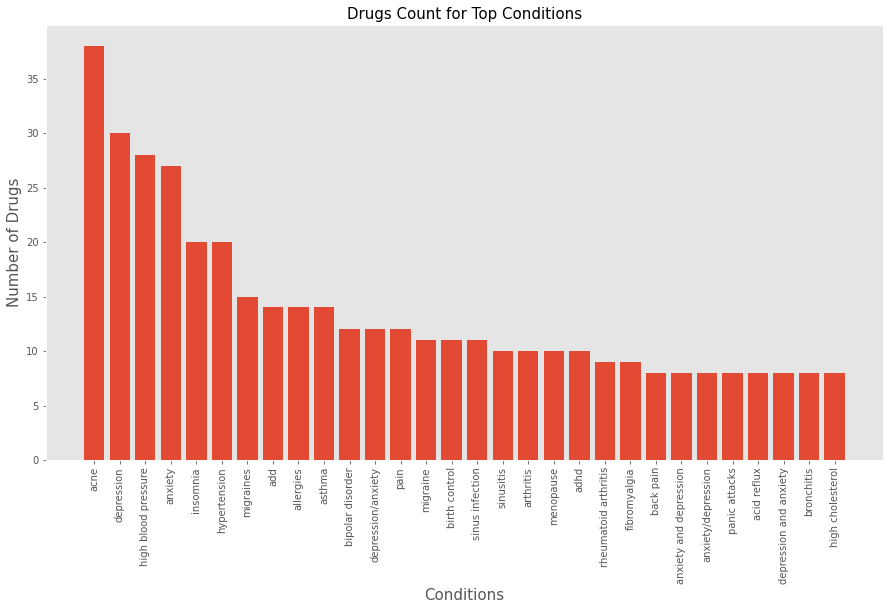

In [13]:
df = DrugsLib_combined.groupby(['condition'])['urlDrugName'].nunique().sort_values(ascending = False).reset_index().head(30)
plt.rcParams['figure.figsize'] = [15, 8]
plt.bar(x=df['condition'],height = df['urlDrugName'])
plt.grid(b=None)
plt.xticks(rotation=90)
plt.title('Drugs Count for Top Conditions', fontsize = 15)
plt.xlabel('Conditions', fontsize = 15)
plt.ylabel('Number of Drugs', fontsize = 15)
plt.show()

### Number of conditions present per drug

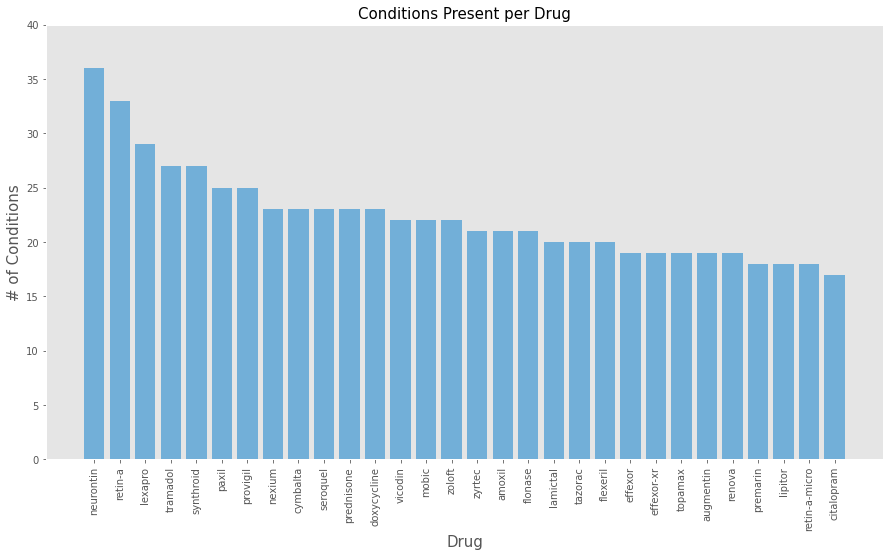

In [14]:
df = DrugsLib_combined.groupby(['urlDrugName'])['condition'].nunique().sort_values(ascending = False).reset_index().head(30)
plt.rcParams['figure.figsize'] = [15, 8]
plt.bar(x=df['urlDrugName'],height = df['condition'],color = '#007acc',alpha=0.5)
plt.grid(b=None)
plt.title('Conditions Present per Drug', fontsize = 15)
plt.xlabel('Drug', fontsize = 15)
plt.ylabel('# of Conditions', fontsize = 15)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,45,5))
plt.show()

### Most Common Conditions based on Reviews

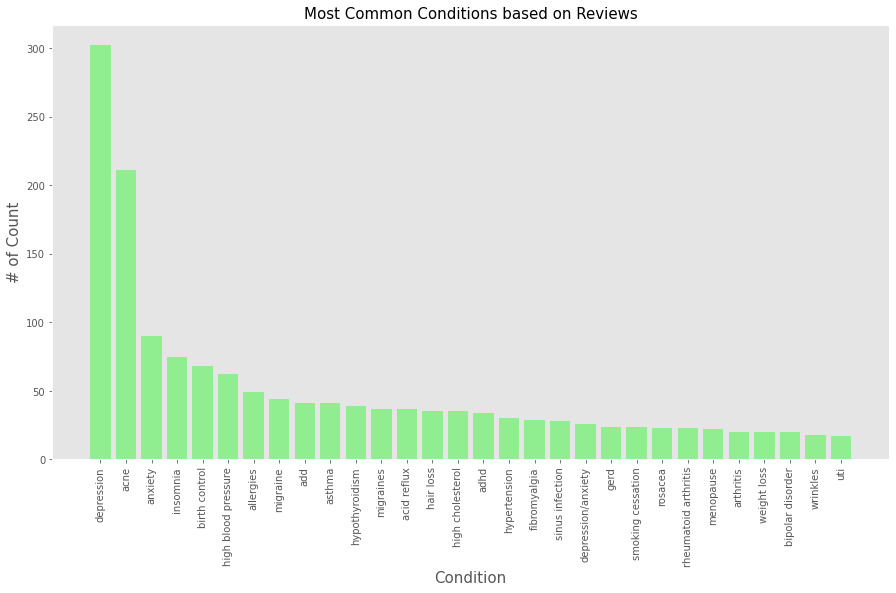

In [15]:
df = DrugsLib_combined['condition'].value_counts().head(30).reset_index()
df.columns = ['condition','count']
plt.grid(b=None)
plt.rcParams['figure.figsize'] = [15, 8]
plt.bar(x=df['condition'],height = df['count'],color = 'lightgreen')
plt.xticks(rotation=90)
plt.title('Most Common Conditions based on Reviews', fontsize = 15)
plt.xlabel('Condition', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

### Ratings Distribution

([<matplotlib.axis.XTick at 0x7f1e50776d90>,
 <a list of 10 Text major ticklabel objects>)

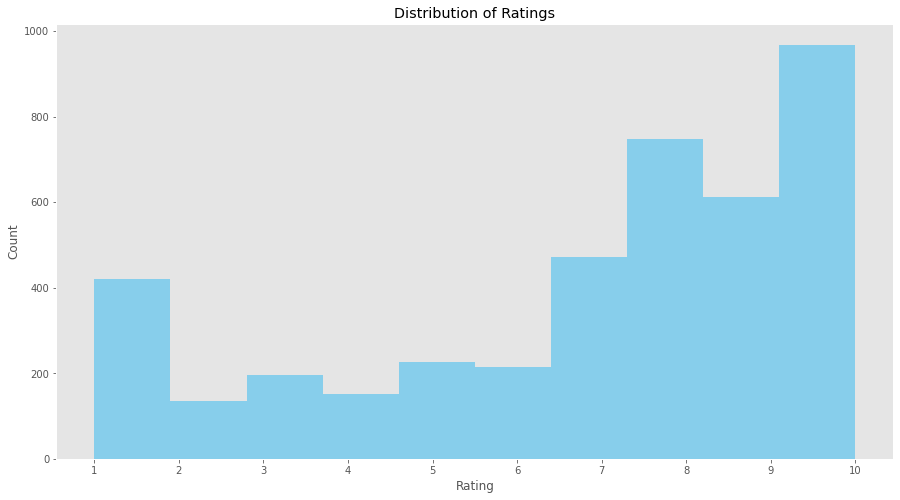

In [16]:
# Look at distribution of ratings
DrugsLib_combined.rating.hist(color='skyblue')
plt.grid(b=None)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks([i for i in range(1, 11)])

Text(0, 0.5, 'Count')

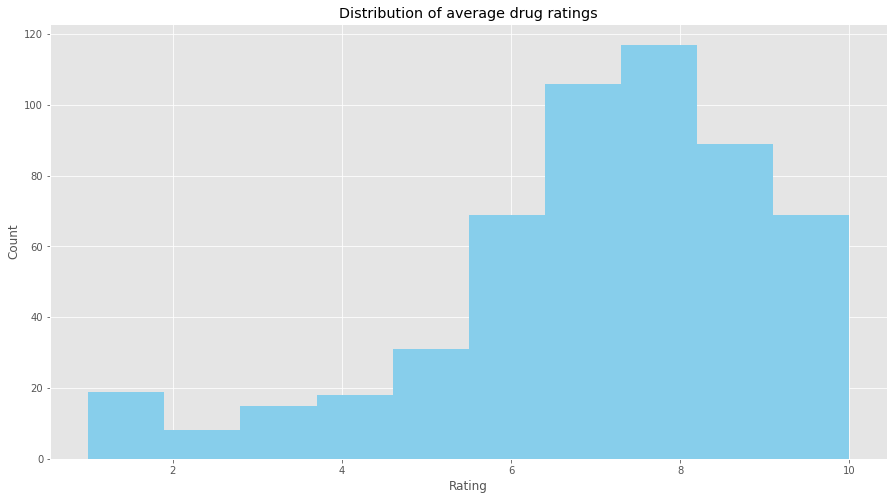

In [17]:
rating_avgs = (DrugsLib_combined['rating'].groupby(DrugsLib_combined['urlDrugName']).mean())
rating_avgs.hist(color='skyblue')
plt.title('Distribution of average drug ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

### Distribution of review ratings

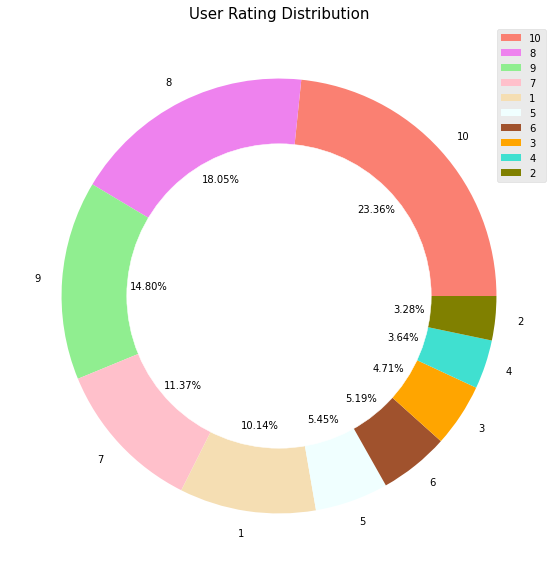

In [19]:
# Frequency of each rating
df = DrugsLib_combined['rating'].value_counts().reset_index()

# Converting float rating values to int
df.columns = ['rating','count']
df = df.astype({'rating':'int'})

# Plotting user rating distribution
size = df['count']
colors = ['salmon','violet','lightgreen','pink','wheat','azure','sienna','orange','turquoise','olive']
labels = df['rating']

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size,colors = colors,labels = labels, autopct = '%.2f%%')
plt.title('User Rating Distribution', fontsize = 15)
plt.legend()
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.show()